In [12]:
import pandas as pd

# Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
df = pd.read_csv("C:/Users/Mykola/Documents/GitHub/Data_science_hw_2/bestsellers_with_categories.csv")


In [13]:
print(df.head())


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [14]:
print("Розмір датасету:", df.shape)

Розмір датасету: (550, 7)


In [ ]:
Відповідь: Про скільки книг зберігає дані датасет? 550

Для кожної з книг доступні 7 змінних (колонок). Давайте розглянемо їх детальніше:

Name - назва книги
Author - автор
User Rating - рейтинг (за 5-бальною шкалою)
Reviews - кількість відгуків
Price - ціна (у доларах станом на 2020 рік)
Year - рік, коли книга потрапила до рейтингу Топ-50
Genre - жанр

In [15]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [16]:
missing_data = df.isna().sum()
print("Кількість пропусків в кожному стовпці:")
print(missing_data)


Кількість пропусків в кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [17]:
unique_genres = df['genre'].unique()
print("Унікальні жанри:")
print(unique_genres)


Унікальні жанри:
['Non Fiction' 'Fiction']


In [ ]:
Відповідь: Які є унікальні жанри? Fiction і Non Fiction.

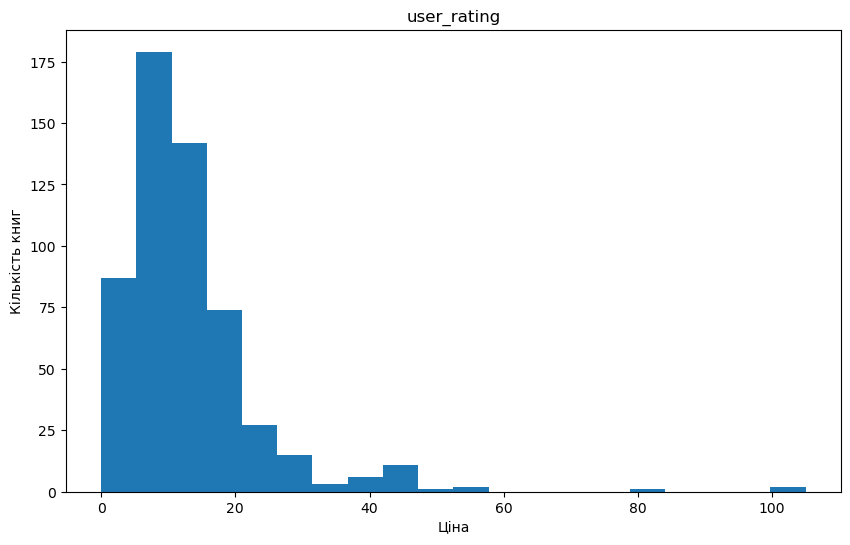

In [23]:
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title("user_rating")
plt.xlabel("Ціна")
plt.ylabel("Кількість книг")
plt.show()


In [21]:
print(df.columns)

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [24]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [ ]:
Відповідь: Максимальна ціна? 105

Відповідь: Мінімальна ціна? 0

Відповідь: Середня ціна? 13.1

Відповідь: Медіанна ціна? 11.27

In [ ]:
Пошук та сортування даних:
Відповідь: Який рейтинг у датасеті найвищий? 4.9

Відповідь: Скільки книг мають такий рейтинг? 52

Відповідь: Яка книга має найбільше відгуків? "Where the Crawdads Sing" (автор Delia Owens)

Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? "The Girl on the Train" (автор Paula Hawkins)

Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 24

Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 11

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [25]:
cheap_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_cheap_books_2015 = cheap_books_2015.sort_values(by='price')

print("Остання книга у відсортованому списку:", sorted_cheap_books_2015.iloc[-1])


Остання книга у відсортованому списку: name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


In [ ]:
Відповідь: Яка книга остання у відсортованому списку? "The Road to Serfdom" (автор F.A. Hayek)

In [26]:
genre_price_stats = df.groupby('genre')['price'].agg(['min', 'max'])
print(genre_price_stats)


             min  max
genre                
Fiction        0   82
Non Fiction    0  105


In [ ]:
Відповідь: Максимальна ціна для жанру Fiction: 105

Відповідь: Мінімальна ціна для жанру Fiction: 0

Відповідь: Максимальна ціна для жанру Non Fiction: 82

Відповідь: Мінімальна ціна для жанру Non Fiction: 0

In [27]:
author_book_counts = df.groupby('author').size().reset_index(name='book_count')
print(author_book_counts)


                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [ ]:
Відповідь: Якої розмірності вийшла таблиця? 248 рядків і 2 стовпці.

Відповідь: Який автор має найбільше книг? Jeff Kinney.

Відповідь: Скільки книг цього автора? 12.

In [28]:
author_avg_ratings = df.groupby('author')['user_rating'].mean().reset_index(name='avg_rating')
print(author_avg_ratings)


                         author  avg_rating
0              Abraham Verghese    4.600000
1                Adam Gasiewski    4.400000
2                 Adam Mansbach    4.800000
3                     Adir Levy    4.800000
4    Admiral William H. McRaven    4.700000
..                          ...         ...
243             Walter Isaacson    4.566667
244               William Davis    4.400000
245            William P. Young    4.600000
246            Wizards RPG Team    4.800000
247                Zhi Gang Sha    4.600000

[248 rows x 2 columns]


In [ ]:
Відповідь: У якого автора середній рейтинг мінімальний? Veronica Roth.

Відповідь: Який у цього автора середній рейтинг? 4.075.

In [29]:
author_summary = pd.concat([author_book_counts, author_avg_ratings], axis=1)
print(author_summary)


                         author  book_count                      author  \
0              Abraham Verghese           2            Abraham Verghese   
1                Adam Gasiewski           1              Adam Gasiewski   
2                 Adam Mansbach           1               Adam Mansbach   
3                     Adir Levy           1                   Adir Levy   
4    Admiral William H. McRaven           1  Admiral William H. McRaven   
..                          ...         ...                         ...   
243             Walter Isaacson           3             Walter Isaacson   
244               William Davis           2               William Davis   
245            William P. Young           2            William P. Young   
246            Wizards RPG Team           3            Wizards RPG Team   
247                Zhi Gang Sha           2                Zhi Gang Sha   

     avg_rating  
0      4.600000  
1      4.400000  
2      4.800000  
3      4.800000  
4      4.

In [30]:
sorted_author_summary = author_summary.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])
print(sorted_author_summary)


                                 author  book_count  \
171                      Muriel Barbery           1   
43                         Chris Cleave           1   
109                   Ian K. Smith M.D.           1   
186                        Pierre Dukan           1   
81                     Elizabeth Strout           1   
..                                  ...         ...   
11   American Psychological Association          10   
226                     Suzanne Collins          11   
92                         Gary Chapman          11   
197                        Rick Riordan          11   
120                         Jeff Kinney          12   

                                 author  avg_rating  
171                      Muriel Barbery    4.000000  
43                         Chris Cleave    4.100000  
109                   Ian K. Smith M.D.    4.100000  
186                        Pierre Dukan    4.100000  
81                     Elizabeth Strout    4.200000  
..             

In [ ]:
Відповідь: Який автор перший у списку? A.J. Jacobs.